# Heat equation - Cooling of intrusions
## Part 1: Analytical solution




### Cooling of a dyke

Your task is to employ this script to calculate the temperature profile across the dyke at particular times after the intrusion, and the temperature evolution at specific points in space. 

To do that you will need to enter the correct initial and boundary conditions of the model and run the calculation several times to produce the desired outputs (figures). 

### Libraries
First we define the libraries that we will need for the calculation

In [8]:
import matplotlib.pyplot as plt
%matplotlib notebook

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

import numpy as np
from scipy.special import erf

## Physical parameters
A dyke intrudes the country rocks at x = 0, and t = 0. The width of the dyke is W and the temperature in the dyke at the time of intrusion is T_i. The host rock is at temperature T_0. We will calculate the temperature profile perpendicular to the strike of the dyke, at various times. The length of the profile is L.

Now we define the physical parameters. These are the initial conditions you need to change.

In [9]:
L = 400             # model length (m)
T_0 = 100           # temperature host rock (C)
T_i = 1200          # temperature intrusion (C)
k = 1e-6            # thermal diffusivity rocks (m2/s)
W = 20              # width of intrusion (m)
D = 50              # distance from center of dyke where we want temperature evolution
t = 365*24*3600     # time for which we want a temperature profile (s) 
                    # and evolution of temperature at pt D until time t

### Numerical parameters

Now we define the numerical parameters. These control the size and resolution of the space and time vectors.  

In [10]:
dx = 1      # point every 1
nx = L+1    # number of points
x = np.linspace(-L/2, L/2, num=nx)  # defines the position in the profile

### Temperature profile at time t

Now calculate the temperature profile for all x, at time t.

In [11]:
A = 1 / (2 * np.sqrt(k * t))
B = np.multiply((W/2 - x),  A)
C = np.multiply((W/2 + x), A)
T = T_0 + np.multiply((T_i-T_0) / 2, (erf(B)+erf(C)))

<IPython.core.display.Javascript object>


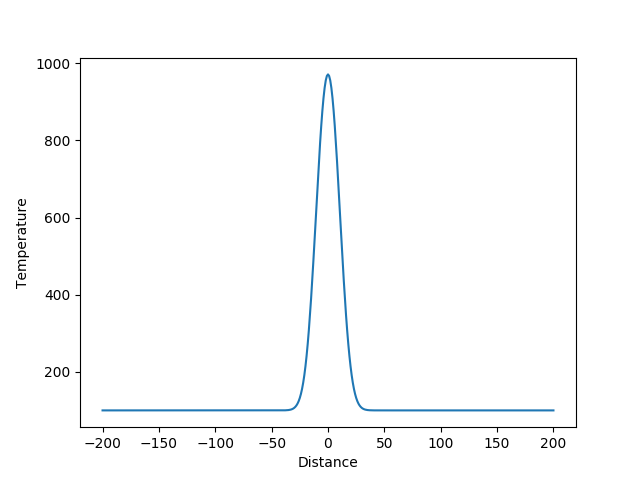

In [12]:
plt.figure(1)
plt.plot(x,T)
plt.ylabel('Temperature')
plt.xlabel('Distance')
plt.show()

### Temperature evolution at point D

Now we must create a time vector and calculate the temperature at distance D for each time.


In [13]:
tend = 1*365*24*3600      # time end of simulation in seconds
dt = 24*3600             # time interval between measure
nt = int(tend / (dt+1))          # number of points in time evolution
t = np.linspace(0,tend,nt)  # time vector
Te = np.zeros(t.shape)
Te[0] = T_0

for k in range(1,nt):
    A = 1 / (2 * np.sqrt(k * t[k]))
    B = np.multiply((W/2 - D),  A)
    C = np.multiply((W/2 + D), A)
    Te[k] = T_0 + np.multiply((T_i-T_0) / 2, (erf(B)+erf(C)))

### Temperature evolution

Now we extract from the profile the temperature at the distance D. 



<IPython.core.display.Javascript object>


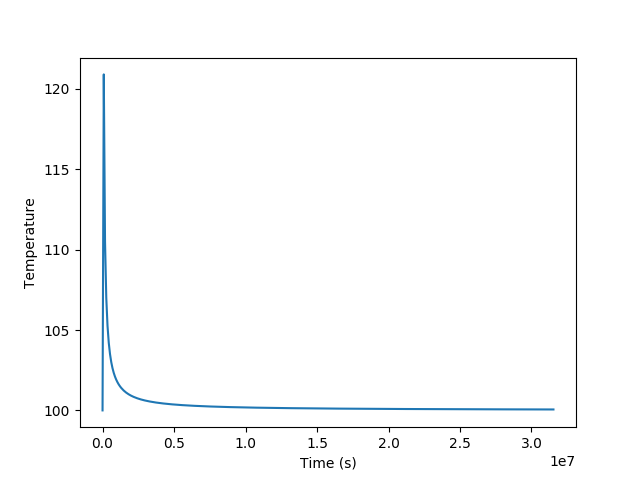

In [14]:
plt.figure(2)
plt.plot(t,Te)
plt.ylabel('Temperature')
plt.xlabel('Time (s)')
plt.show()

## Tasks
1 - Run the simulation in order to get the temperature profiles after a month, 6 months and year. Save the figures and place them in a report. Describe and comment the temperature profiles. 

2 - Run the simulation in order to get temperature evolution over a year at 10, 50, 100 and 150 m. Save the figures and place them in the report. Using the mouse get the time coordinate of the peak in each figure. Plot the position of peak versus time. Describe and comment the plot.